In [1]:
import random
import gym
import gym_sdwan
import numpy as np

import csv

import logging 
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
ENV_NAME = "Sdwan-v0"


In [3]:
class RandomAgent:

    def __init__(self, observation_space, action_space):
        self.action_space = action_space
 
    def act(self, state):
        return random.randrange(self.action_space)


In [6]:
env = gym.make(ENV_NAME)

observation_space = env.observation_space.shape[0]
action_space = env.action_space.n
agent = RandomAgent(observation_space, action_space)
run = 0
score = 0
MAX_RUN = 3
score_card = []
while run < MAX_RUN:
    run += 1
    state = env.reset()
    state = np.reshape(state, [1, observation_space])
    step = 0
    while True:
        step += 1
        
        action = agent.act(state)
        state_next, reward, terminal, info = env.step(action)
        #reward = reward if not terminal else -reward
        state_next = np.reshape(state_next, [1, observation_space])
        score += reward
        state = state_next
        if terminal:
            print ("Run: " + str(run)  + ", score: " + str(score))
            score_card.append((run, score))
            break
        

2018-12-11 18:04:18,697 - root - INFO - SdwanEnv - Version 0.1.0


/home/amitabha/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


2018-12-11 18:05:05,354 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:05:20,394 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:05:35,443 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:05:50,488 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:06:05,537 - root - DEBUG - current bw:6.43, sla bw:6.0
2018-12-11 18:06:20,583 - root - DEBUG - current bw:9.62, sla bw:6.0
2018-12-11 18:06:35,635 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:06:50,741 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:07:05,775 - root - DEBUG - current bw:8.46, sla bw:6.0
2018-12-11 18:07:20,826 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:07:35,948 - root - DEBUG - current bw:7.82, sla bw:6.0
2018-12-11 18:07:50,998 - root - DEBUG - current bw:5.42, sla bw:6.0
2018-12-11 18:07:51,002 - root - DEBUG - BW is less than SLA
2018-12-11 18:08:06,065 - root - DEBUG - current bw:10.0, sla bw:6.0
2018-12-11 18:08:21,117 - root - DEBUG - c

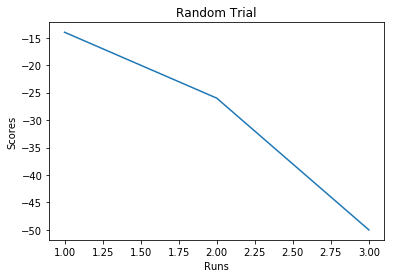

In [7]:

def draw_graph(data, title):
    # x axis values 
    x =   [x[0] for x in data]
    #print (x)
    # corresponding y axis values 
    y =  [x[1] for x in data]
    #print (y)

    # plotting the points  
    plt.plot(x, y) 
    


    # naming the x axis 
    plt.xlabel('Runs') 
    # naming the y axis 
    plt.ylabel('Scores') 

    # giving a title to my graph 
    plt.title(title) 

    # show a legend on the plot 
    #plt.legend() 

    # function to show the plot 
    plt.show() 

draw_graph(score_card, 'Random Trial')

In [ ]:
with open('random_score_card.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(score_card)


In [8]:
env.cleanup()